In [1]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [2]:
%pip install yfinance


In [3]:
%pip install matplotlib

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [5]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [7]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-04-10,79626.140625,82700.929688,78456.132812,82565.976562,44718000633
2025-04-11,83404.835938,84247.476562,78936.320312,79625.046875,41656778779
2025-04-12,85287.109375,85856.187500,82769.375000,83404.515625,24258059104
2025-04-13,83684.976562,86015.187500,83027.007812,85279.468750,28796984817
2025-04-14,84869.578125,85310.531250,83714.000000,83714.000000,31903162368


In [8]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3863.0,2.153243e+04,2.480080e+04,1.781030e+02,1.729345e+03,9.664730e+03,3.503910e+04,1.061463e+05
High,BTC-USD,3863.0,2.198949e+04,2.531076e+04,2.117310e+02,1.787190e+03,9.824619e+03,3.592871e+04,1.091149e+05
Low,BTC-USD,3863.0,2.100751e+04,2.422215e+04,1.715100e+02,1.656495e+03,9.458150e+03,3.380081e+04,1.052917e+05
Open,BTC-USD,3863.0,2.151177e+04,2.478367e+04,1.768970e+02,1.723505e+03,9.663318e+03,3.504039e+04,1.061473e+05
Volume,BTC-USD,3863.0,1.926807e+10,2.083670e+10,5.914570e+06,7.324295e+08,1.540991e+10,3.048461e+10,3.509679e+11


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3863 entries, 2014-09-17 to 2025-04-14
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3863 non-null   float64
 1   (High, BTC-USD)    3863 non-null   float64
 2   (Low, BTC-USD)     3863 non-null   float64
 3   (Open, BTC-USD)    3863 non-null   float64
 4   (Volume, BTC-USD)  3863 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.1 KB


In [10]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [11]:
#Close price data
closing_price = stock_data[['Close']]

In [12]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-04-10,79626.140625
2025-04-11,83404.835938
2025-04-12,85287.109375


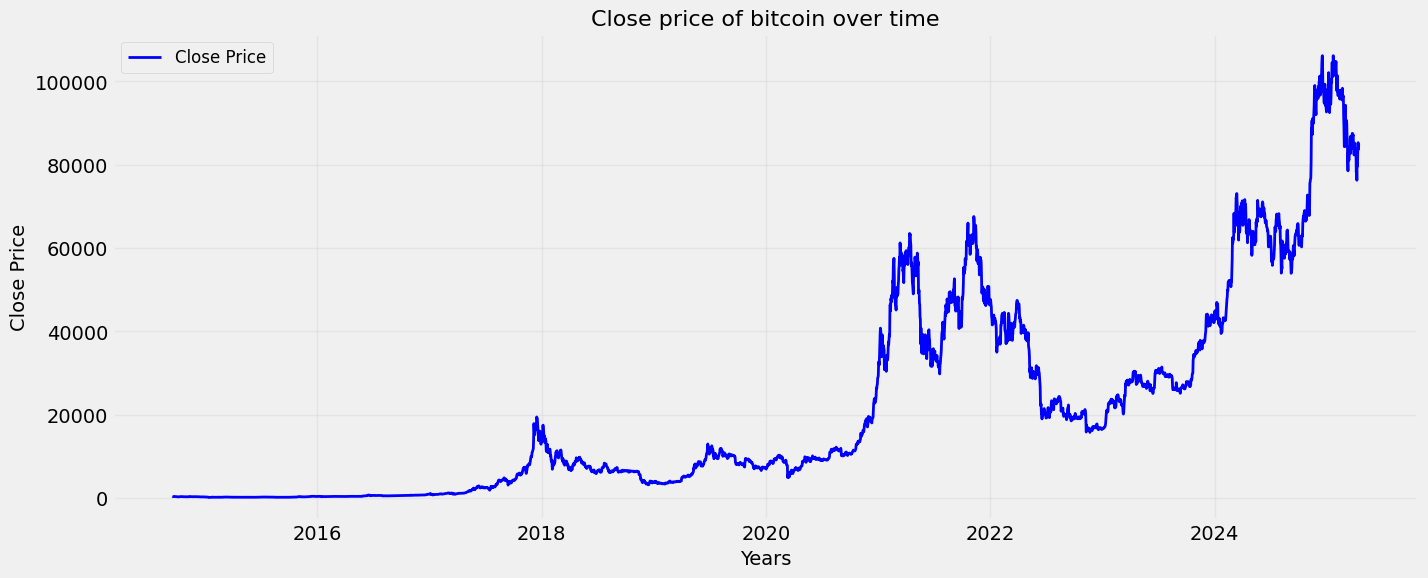

In [13]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [14]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [15]:
df1 = pd.DataFrame(temp_data)

In [16]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [17]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [18]:
closing_price.loc[:, 'MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price.loc[:, 'MA_100'] = closing_price['Close'].rolling(window=100).mean()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9356\3811396147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price.loc[:, 'MA_365'] = closing_price['Close'].rolling(window=365).mean()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9356\3811396147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price.loc[:, 'MA_100'] = closing_price['Close'].rolling(window=100).mean()


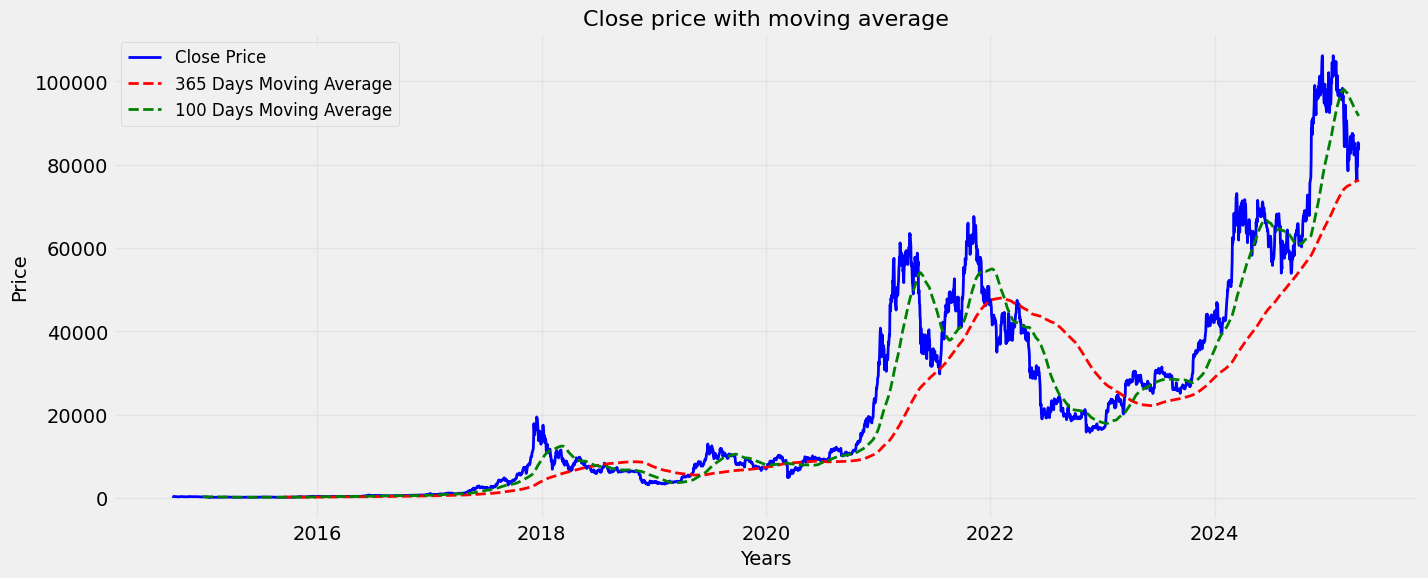

In [19]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [20]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [21]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [22]:
len(scaled_data)

3863

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [25]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [26]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [27]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

C:\Users\LENOVO\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - loss: 0.0014
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 73s 107ms/step - loss: 2.7328e-04
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 75s 110ms/step - loss: 1.8371e-04
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 73s 107ms/step - loss: 1.5139e-04
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 75s 111ms/step - loss: 1.2820e-04
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 72s 106ms/step - loss: 1.2841e-04
Epoch 7/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 74s 109ms/step - loss: 1.0411e-04
Epoch 8/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 74s 110ms/step - loss: 1.1799e-04
Epoch 9/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 67s 99ms/step - loss: 1.0648e-04
Epoch 10/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 70s 104ms/step - loss: 1.1388e-04


In [29]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step


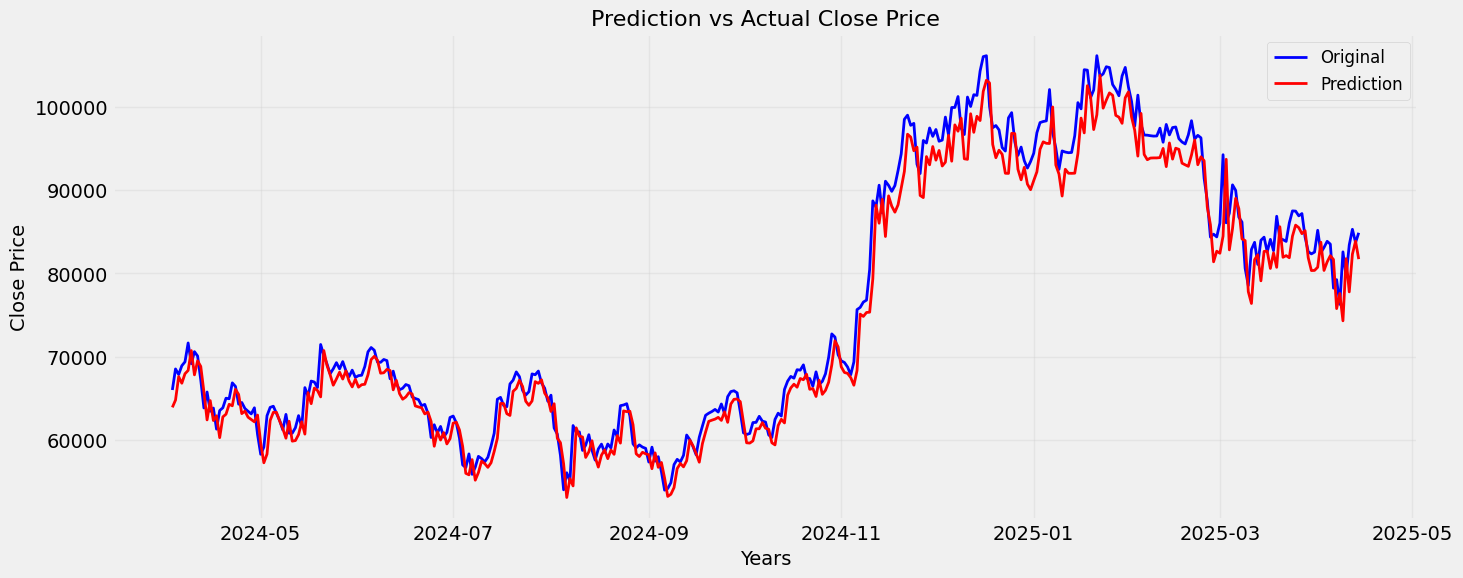

In [30]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [31]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [32]:
future_predictions

[array([[83156.64]], dtype=float32),
 array([[81007.3]], dtype=float32),
 array([[78830.]], dtype=float32),
 array([[76709.19]], dtype=float32),
 array([[74717.82]], dtype=float32),
 array([[72884.734]], dtype=float32),
 array([[71213.31]], dtype=float32),
 array([[69693.98]], dtype=float32),
 array([[68311.266]], dtype=float32),
 array([[67047.91]], dtype=float32)]

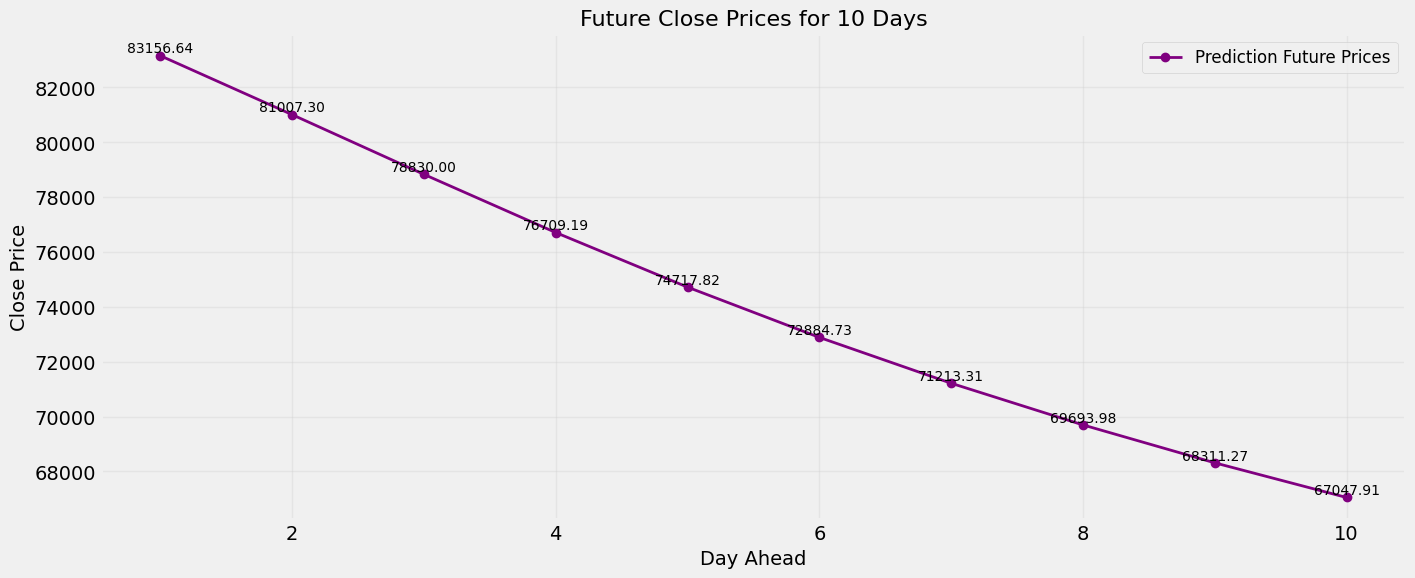

In [33]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [34]:
model.save("model.keras")              

In [35]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%run app.py


 * Serving Flask app 'app'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [14/Apr/2025 17:37:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:37:03] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Apr/2025 17:37:13] "POST / HTTP/1.1" 302 -
[*********************100%***********************]  1 of 1 completed


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


127.0.0.1 - - [14/Apr/2025 17:37:18] "GET /predict?stock=BTC-USD&no_of_days=10 HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:37:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:38:04] "POST / HTTP/1.1" 302 -
[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


127.0.0.1 - - [14/Apr/2025 17:38:07] "GET /predict?stock=XRP-USD&no_of_days=10 HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:38:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:38:37] "POST / HTTP/1.1" 302 -
[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


127.0.0.1 - - [14/Apr/2025 17:38:41] "GET /predict?stock=TRX-USD&no_of_days=10 HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:38:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:39:16] "POST / HTTP/1.1" 302 -
[*********************100%***********************]  1 of 1 completed


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


127.0.0.1 - - [14/Apr/2025 17:39:20] "GET /predict?stock=PI-USD&no_of_days=10 HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:40:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2025 17:40:23] "POST / HTTP/1.1" 302 -
[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


127.0.0.1 - - [14/Apr/2025 17:40:27] "GET /predict?stock=DOGE-USD&no_of_days=10 HTTP/1.1" 200 -
